In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/coffee-sales/index_1.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df.info

<bound method DataFrame.info of             date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
3631  2025-03-23  2025-03-23 10:34:54.894      card  ANON-0000-0000-1158   
3632  2025-03-23  2025-03-23 14:43:37.362      card  ANON-0000-0000-1315   
3633  2025-03-23  2025-03-23 14:44:16.864      card  ANON-0000-0000-1315   
3634  2025-03-23  2025-03-23 15:47:28.723      card  ANON-0000-0000-1316   
3635  2025-03-23  2025-03-23 18:11:38.635      card  ANON-0000-0000-1275   

      money    coffee_name  
0     38.70          Latte

In [5]:
df.shape

(3636, 6)

In [6]:
df['date']=pd.to_datetime(df['date'])

In [7]:
coffee_sales = df.groupby('coffee_name')['money'].sum()
print(coffee_sales)

coffee_name
Americano              15062.26
Americano with Milk    25269.12
Cappuccino             18034.14
Cocoa                   8678.16
Cortado                 7534.86
Espresso                2814.28
Hot Chocolate          10172.46
Latte                  27866.30
Name: money, dtype: float64


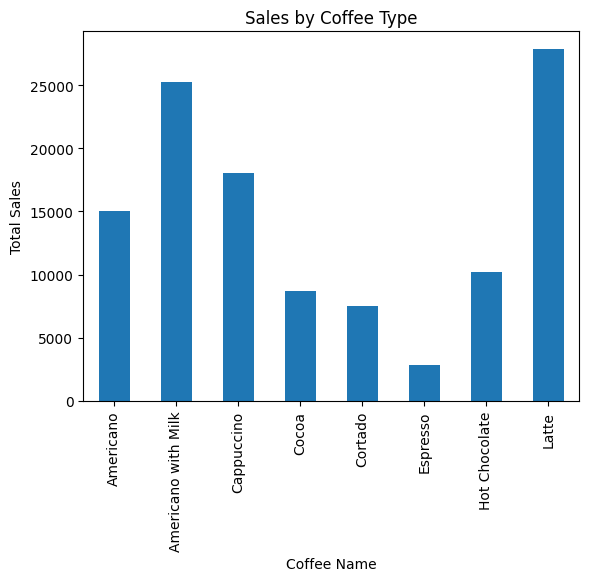

In [8]:
import matplotlib.pyplot as plt
coffee_sales.plot(kind='bar', title='Sales by Coffee Type', xlabel='Coffee Name', ylabel='Total Sales')
plt.show()


In [9]:
df['month']=df['date'].dt.month

In [10]:
monthly_sales = df.groupby('month')['money'].sum()
print(monthly_sales)

month
1      6398.86
2     13215.48
3     17036.64
4      6720.56
5      9063.42
6      7758.76
7      6915.94
8      7613.84
9      9988.64
10    13891.16
11     8590.54
12     8237.74
Name: money, dtype: float64


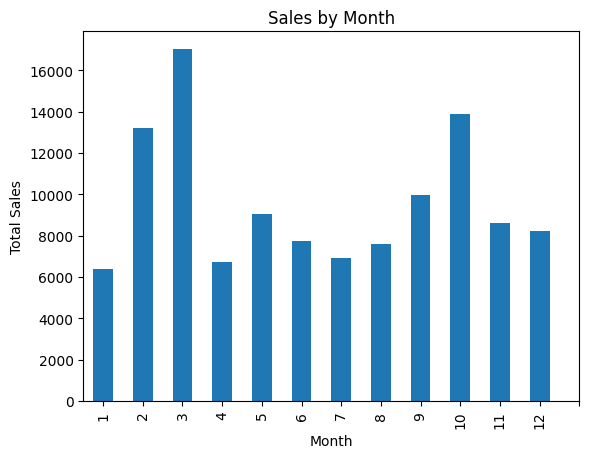

In [11]:
monthly_sales.plot(kind='bar', title='Sales by Month', xlabel='Month', ylabel='Total Sales')
plt.xticks(range(0, 13))
plt.show()

In [12]:
monthly_coffee_sales = df.groupby(['month', 'coffee_name'])['money'].sum().reset_index()

best_selling_per_month = monthly_coffee_sales.loc[monthly_coffee_sales.groupby('month')['money'].idxmax()]
print(best_selling_per_month)

    month          coffee_name    money
1       1  Americano with Milk  1604.72
8       2            Americano  3037.32
23      3                Latte  3912.82
26      4           Cappuccino  1659.44
39      5                Latte  2198.00
41      6  Americano with Milk  2268.12
49      7  Americano with Milk  1863.80
57      8  Americano with Milk  2010.24
71      9                Latte  3114.48
79     10                Latte  4291.20
87     11                Latte  2431.68
89     12  Americano with Milk  1759.02


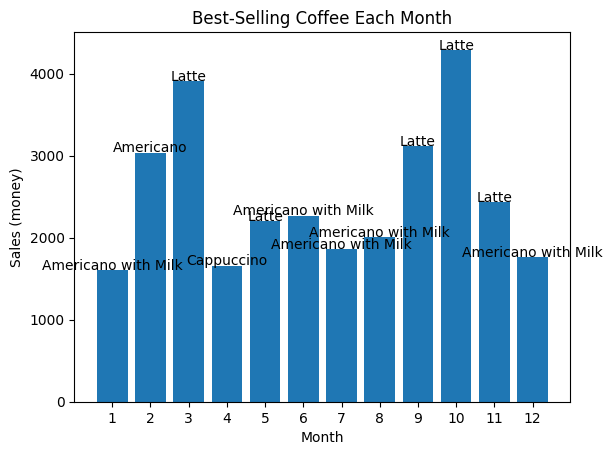

In [14]:
plt.bar(best_selling_per_month['month'], best_selling_per_month['money'])
for idx, row in best_selling_per_month.iterrows():
    plt.text(row['month'], row['money'] + 5, row['coffee_name'], ha='center')
plt.xlabel('Month')
plt.ylabel('Sales (money)')
plt.title('Best-Selling Coffee Each Month')
plt.xticks(best_selling_per_month['month'])
plt.show()
